# Lab: Introduction to Python

## Basic Commands in NumPy

In this notebook, we rework through Lab 1 in ISLR using Python instead of R. We will use the packages `numpy`, `pandas`, `scipy`, `matplotlib.pyplot`, and `seaborn` in order to do so. Let's start by importing the two most `numpy`, which will allow us to use NumPy arrays, and `pandas` which will allow us to use Pandas series and dataframes.

In [1]:
import numpy as np
import pandas as pd

Having imported `numpy` and `pandas`, let's create some NumPy arrays to work with and demonstrate some basic operations.

In [2]:
x = np.array([1, 3, 2, 5])
x

array([1, 3, 2, 5])

In [3]:
y = np.array([1, 4, 3])
y

array([1, 4, 3])

If we want to learn more a function or object, we can type `foo?` to access the docstring, or `foo??` to access the docstring and the Python code used as implementation.

In [4]:
np.array?

In [5]:
np.sum??

If we wish to get information regarding the shape of an array, we have a few different attributes which we can check.

In [6]:
print("x ndim", x.ndim)
print("x shape", x.shape)
print("x size", x.size)

x ndim 1
x shape (4,)
x size 4


If we have two arrays with either the same dimensions, or dimensions which can be broadcast to each other, then we can perform vectorized operations.

In [7]:
x = np.array([1, 6, 2])
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)
x + y

Shape of x: (3,)
Shape of y: (3,)


array([ 2, 10,  5])

If we want to work with matrices, we have two main options depending on the type of data we wish to store. First, would be using NumPy arrays or structured arrays, which a handy for certain specialized situations, such as if we are working with just a single data type or we need to map onto binary data formats in another programming language such as C or Fortran.
To start with, we create a basic two-dimensional NumPy array and perform some math operations with it.

In [8]:
x = np.array([[1, 2], [3, 4]])
print(x)

[[1 2]
 [3 4]]


In [9]:
np.sqrt(x)

array([[1.        , 1.41421356],
       [1.73205081, 2.        ]])

In [10]:
x**2

array([[ 1,  4],
       [ 9, 16]], dtype=int32)

If we want to generate a vector of random variables from a normal distribution with mean $\mu$ and standard deviation $\sigma$, we can use the function `np.random.normal(loc, scale, size)` where `size` is the sample size,`loc` is the mean $\mu$ which defaults to 0 and, and `scale` is the standard deviation $\sigma$ which defaults to 1. If no value is given for `size` then just a single number is returned. In the example below, we create two correlated vectors of numbers and then use the `np.corrcoef` function to generate a matrix of correlation coefficients.

In [11]:
x = np.random.normal(size = 50)
y = x + np.random.normal(loc = 50, scale = 0.1, size = 50)
np.corrcoef(x, y)

array([[1.        , 0.99615987],
       [0.99615987, 1.        ]])

Should we want to reproduce the exact same set of random numbers each time our code is run, we can use the function `np.random.seed(n)`, where `n` is an integer, to set the seed for our random number generator.

In [12]:
np.random.seed(1303)
np.random.normal(size = 7)

array([-0.03425693,  0.06035959,  0.45511859, -0.36593175, -1.6773304 ,
        0.5910023 ,  0.41090101])

Lastly, we can use the `np.average()` and `np.var()` functions to compute the mean and variance of a vector of numbers. In addition, we can use the `np.sd()` function to compute the standard deviation a little more conveniently than using the formula $\sigma = \sqrt{\text{Var}(X)}$.

In [13]:
np.random.seed(1303)
y = np.random.normal(size = 100)
np.average(y)

-0.03406327044711038

In [14]:
np.var(y)

0.8756151013828442

In [15]:
np.var(y)**0.5

0.9357430744509115

In [16]:
np.std(y)

0.9357430744509115

Note that there's a lot more we can do with NumPy arrays, and we haven't even started talking about Pandas dataframes. For more info, Jake VanderPlas's *Python Data Science Handbook* is a good resource.

## Graphics

The two main graphics packages we'll use for plotting are `matplotlib.pyplot` and `seaborn`. To start, we'll import them using their standard aliases. Note that the main idea of Seaborn is to provide a convenient high-level API for producing plots that would be more effort-intensive to produce using raw Matplotlib commands (which is what Seaborn does under the hood). For basic plotting, Matplotlib works just fine, and looks pretty nice after Seaborn's default aesthetic settings are loaded, but for more sophisticated visualizations and working with Pandas dataframes, using Seaborn becomes quite invaluable.

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10, 10]

To start off, let's create a simple scatter plot using the `plt.plot()` command and making sure to choose a preferred marker style.

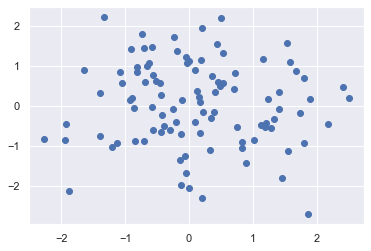

In [18]:
x = np.random.normal(size = 100)
y = np.random.normal(size = 100)
plt.plot(x, y, "o")

We can also use object-oriented methods for plotting instead of the MATLAB-style function we just used. While for simple plots, choosing between the styles is largely a matter of preference, for more-complicated plots the object-oriented approach is generally more convenient.

[Text(0, 0.5, 'This is the y-axis'),
 Text(0.5, 0, 'This is the x-axis'),
 Text(0.5, 1.0, 'This is the title of my plot')]

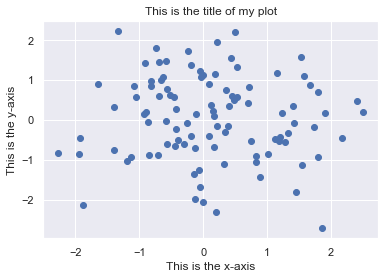

In [19]:
ax = plt.axes()
ax.plot(x, y, "o")
ax.set(xlabel = "This is the x-axis", ylabel = "This is the y-axis",
      title = "This is the title of my plot")

If we want to create a sequence of numbers, we can use the `np.linspace(start, stop, num = 50)` function, which returns a NumPy array of evenly spaced numbers over a specified interval. A similar way to generate such a sequence, but using a step size (instead of the number of samples) is `np.arange`.

In [20]:
print(np.linspace(1, 10, num = 10))
print(np.arange(1, 11))
# Note that arange generates values within the half-open interval [start, stop)

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 1  2  3  4  5  6  7  8  9 10]


Now let's do some fancier visualizations by creating a contour plot. A contour plot requires three main arguments: a grid of $x$ values, a grid of $y$ values, and a grid of $z$ values.

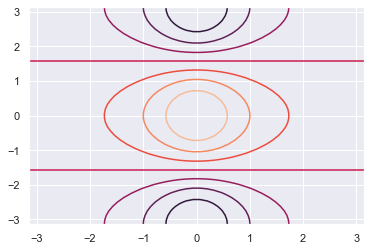

In [21]:
x = np.linspace(-np.pi, np.pi)
y = np.linspace(-np.pi, np.pi)
def f(x, y):
    return np.cos(y)/(1 + x**2)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
plt.contour(X, Y, Z)

We can also specify that we want more levels to be drawn by using the `levels` optional parameter.

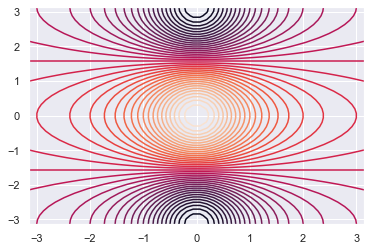

In [22]:
plt.contour(X, Y, Z, levels = 45)

We can also turn our contour plot into a heatmap by switching it to a filled contour plot via the `plt.contourf()` function. In addition, we'll ad a `plt.colorbar()` command to automatically generate an additional axis with labeled color information for the plot.

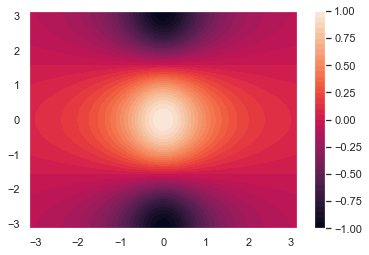

In [23]:
plt.contourf(X, Y, Z, levels = 45)
plt.colorbar()

In order to do 3D plotting using Matplotlib, we need to import the `mplot3d` toolkit.

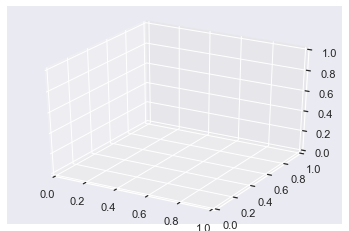

In [24]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = plt.axes(projection = "3d")

Now let's make a three-dimensional contour plot using our previously-defined $X$, $Y$, and $Z$.

Text(0.5, 0, 'z')

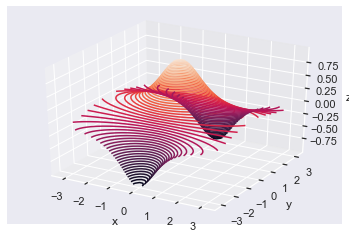

In [25]:
fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.contour3D(X, Y, Z, levels = 60)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

We can also change the viewing angle using the `view_init` method to set the elevation angle (angle relative to the x-y plane) and azimuthal angle (angle rotated counter-clockwise about the z-axis).

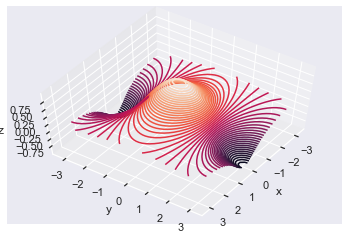

In [26]:
ax.view_init(60, 35)
# The first argument is the elevation
# The second argument is the azimuth
fig

Using the magic command `%matplotlib notebook` we can also generate interactive figures which allow us to click and drag to rotate them.

<IPython.core.display.Javascript object>


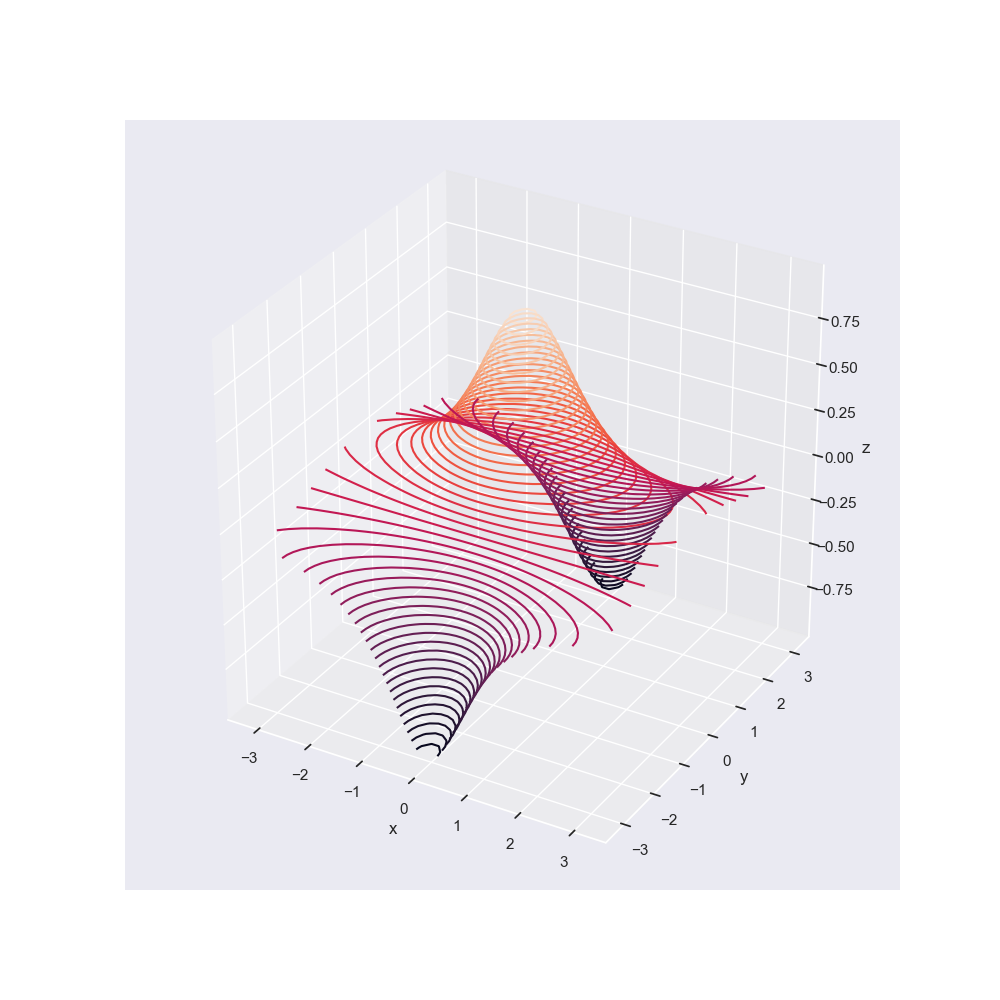

Text(0.5, 0, 'z')

In [27]:
%matplotlib notebook
fig = plt.figure()
ax = plt.axes(projection = "3d")
ax.contour3D(X, Y, Z, levels = 60)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")

## Slicing NumPy Arrays

In this section, we discuss how to slice NumPy arrays to access subsets of the data stored within them. For example, let's suppose our data is stored in the two-dimensional NumPy array `A`.

In [28]:
A = np.arange(16).reshape(4, 4)
print(A)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


To access a single element, we can use a comma-separated tuple of indices `A[i, j]` where `i` is the row index and `j` is the column index. Note that NumPy arrays are zero-indexed and that we can also use negative indices to index from the end of the array.

In [29]:
A[0, 0]

0

In [30]:
A[1, 2]

6

In [31]:
A[2, -1]

11

If we wish to slice an array, we can use the usual slicing syntax for standard Python lists: `A[row_start:row_stop:row_step, col_start:col_stop:col_step]`. Note that array slices are *views* rather than *copies* of the array data. This means that we modifying a slice will modify those entries in the original array.

In [32]:
A[0:2, 1:3] #Access the first two rows and the 2nd+3rd columns

array([[1, 2],
       [5, 6]])

In [36]:
A[0:2, :] #Access the first two rows

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [35]:
A[:,0:2] #Access the first two columns.

array([[ 0,  1],
       [ 4,  5],
       [ 8,  9],
       [12, 13]])

As mentioned before, `A.shape` returns the dimensions of the array as a tuple `(rows, columns)`.

In [38]:
A.shape

(4, 4)

Also note that we can reshape an array (as long as the product of the dimentions remains same) using the command `A.reshape()`.

In [39]:
B = A.reshape((2, 8))
print(B)

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]]


## Loading Data

One of the main ways of importing a data set into Python is to use the `pd.read_csv()` function from the Pandas package, which reads csv files. In order to read a file, we first must navigate to the proper directory where it is stored. For now, we will start by loading the `Auto` data set from a text file, store it as a data frame object, and then use the `head()` function to view the first few rows of data. By default, Pandas will infer the column names from the first line of the file. The option `na_values = ["?"]` tells Pandas that whenever it sees a question mark, it should be treated as a missing element of the data matrix.

In [41]:
auto_filename = "Auto.csv"
auto_data = pd.read_csv(auto_filename, na_values = ["?"])
auto_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


Alternatively, if we wish to look at the entire dataframe, we can simply call it, though it will get truncated. As a bonus, calling the data frame will also tell us the number of rows and columns it contains.

In [42]:
auto_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


A good standard practice is to always check for missing values in the data. To do so, we can uset the `isnull()` and `any()` methods to check for missing values.

In [60]:
auto_data.isnull().any()

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
year            False
origin          False
name            False
dtype: bool

This tells us that there are some rows which have missing horsepower values. To see which rows these are and how many of them are contained in the dataset, we use a boolean mask.

In [62]:
auto_data[auto_data.horsepower.isnull()].shape

(5, 9)

Since there are only five rows with missing values, we'll drop them from the data using the `dropna()` function.

In [63]:
auto_data.dropna(inplace = True)
auto_data.shape

(392, 9)

Now that we have loaded the data and dropped rows with missing values, we can check the `columns` attribute to see the names of the columns.

In [65]:
auto_data.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

## Additional Graphical and Numerical Summaries

First, let's start off by using Seaborn's `relplot()` function to plot a scatterplot of mpg vs the number of cylinders.

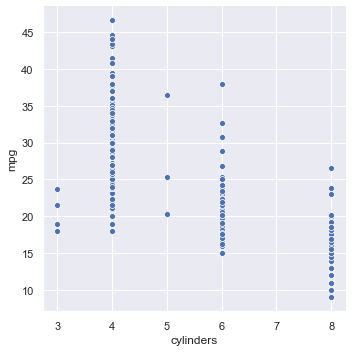

In [81]:
sns.relplot(x = "cylinders", y = "mpg", data = auto_data)

Since the number of cylinders has a small range, we might want to treat it as a categorical variable instead of a quantitative one. The main way of doing this is using Seaborn's `catplot()` function. Two types of categorical plots we can generate are a swarm plot (using the `kind = "swarm"` paramter) and a box plot (using the `kind = "box"` parameter).

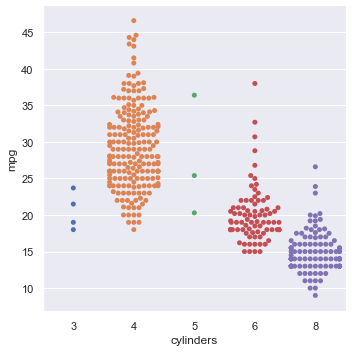

In [82]:
sns.catplot(x = "cylinders", y = "mpg", kind = "swarm", data = auto_data)

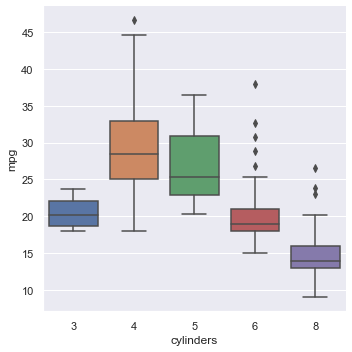

In [83]:
sns.catplot(x = "cylinders", y = "mpg", kind = "box", data = auto_data)

If we want more visual information about the smape of the distribution, which is especially helpful if we are working with a large dataset, we could make a boxen plot using the `kind = "boxen"` parameter.

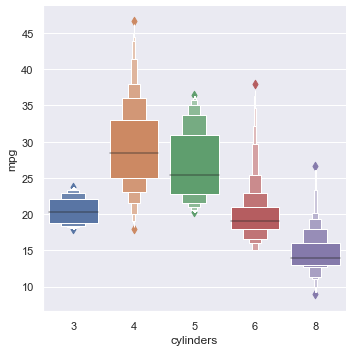

In [84]:
sns.catplot(x = "cylinders", y = "mpg", kind = "boxen", data = auto_data)

By switching the columns corresponding to the x and y axes and using the `orient` parameter, we can also specify that we want our boxplot to be horizontally oriented.

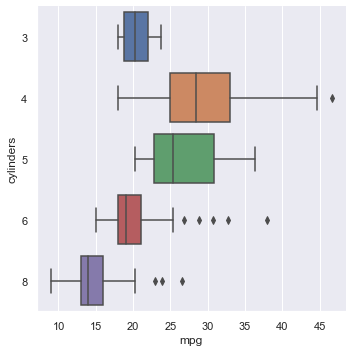

In [88]:
sns.catplot(x = "mpg", y = "cylinders", kind = "box", orient = "h", data = auto_data)

In addition to boxplots, we can produce histograms with the `distplot()` function. Be default, it will draw a histogram and fit a kernel density estimate (KDE). If we don't want the KDE, then we use the parameter `kde = False`.

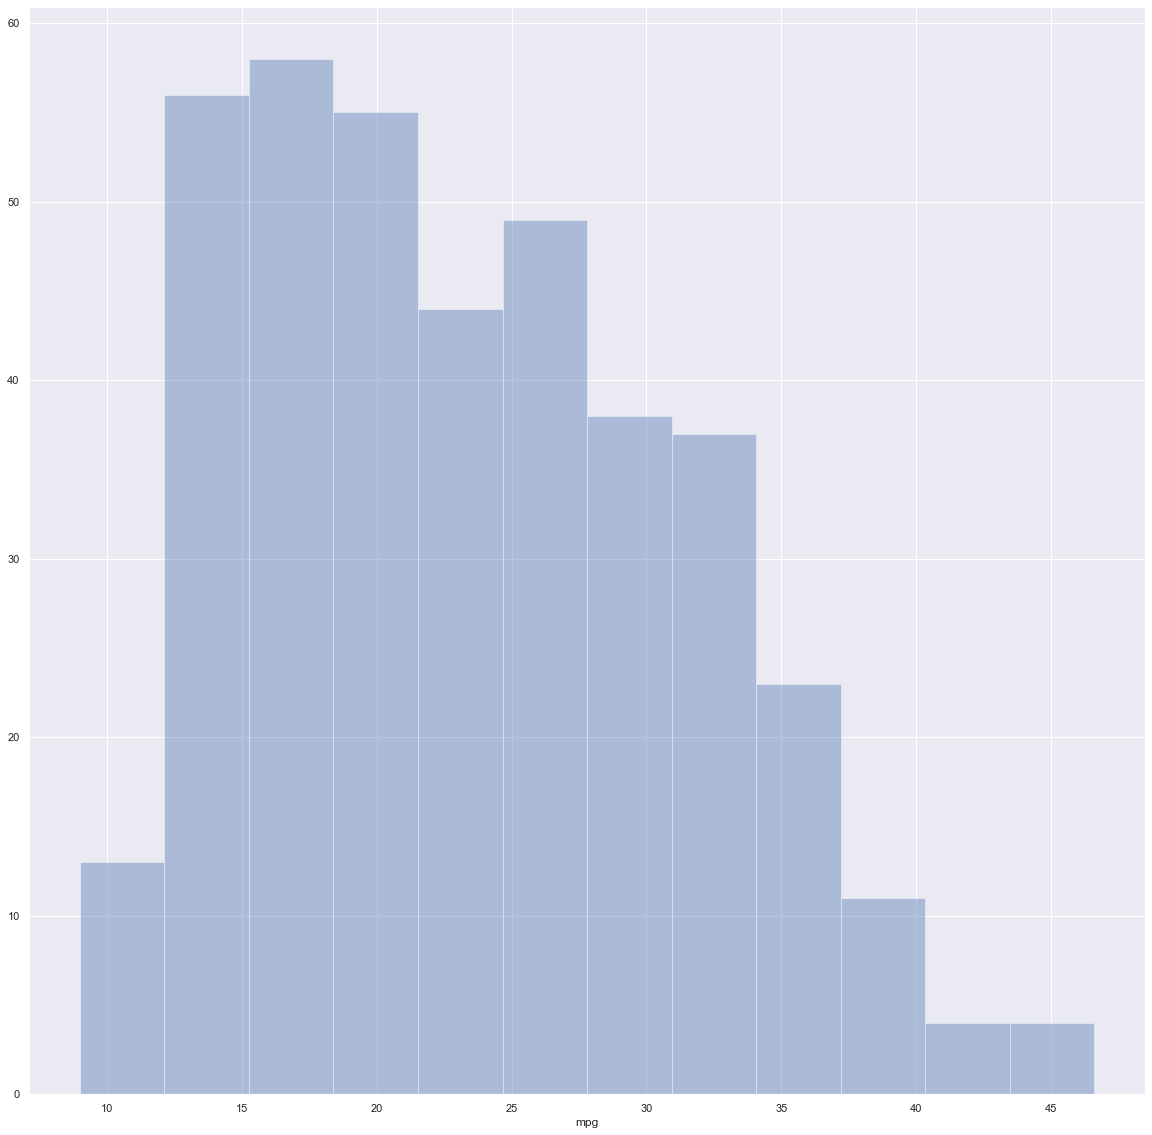

In [89]:
sns.distplot(auto_data["mpg"], kde = False)

If we want to adjust the number of bins from the default, which uses the [Freedman-Diaconis rule](https://en.wikipedia.org/wiki/Freedman%E2%80%93Diaconis_rule), we can set that using the `bins` argument.

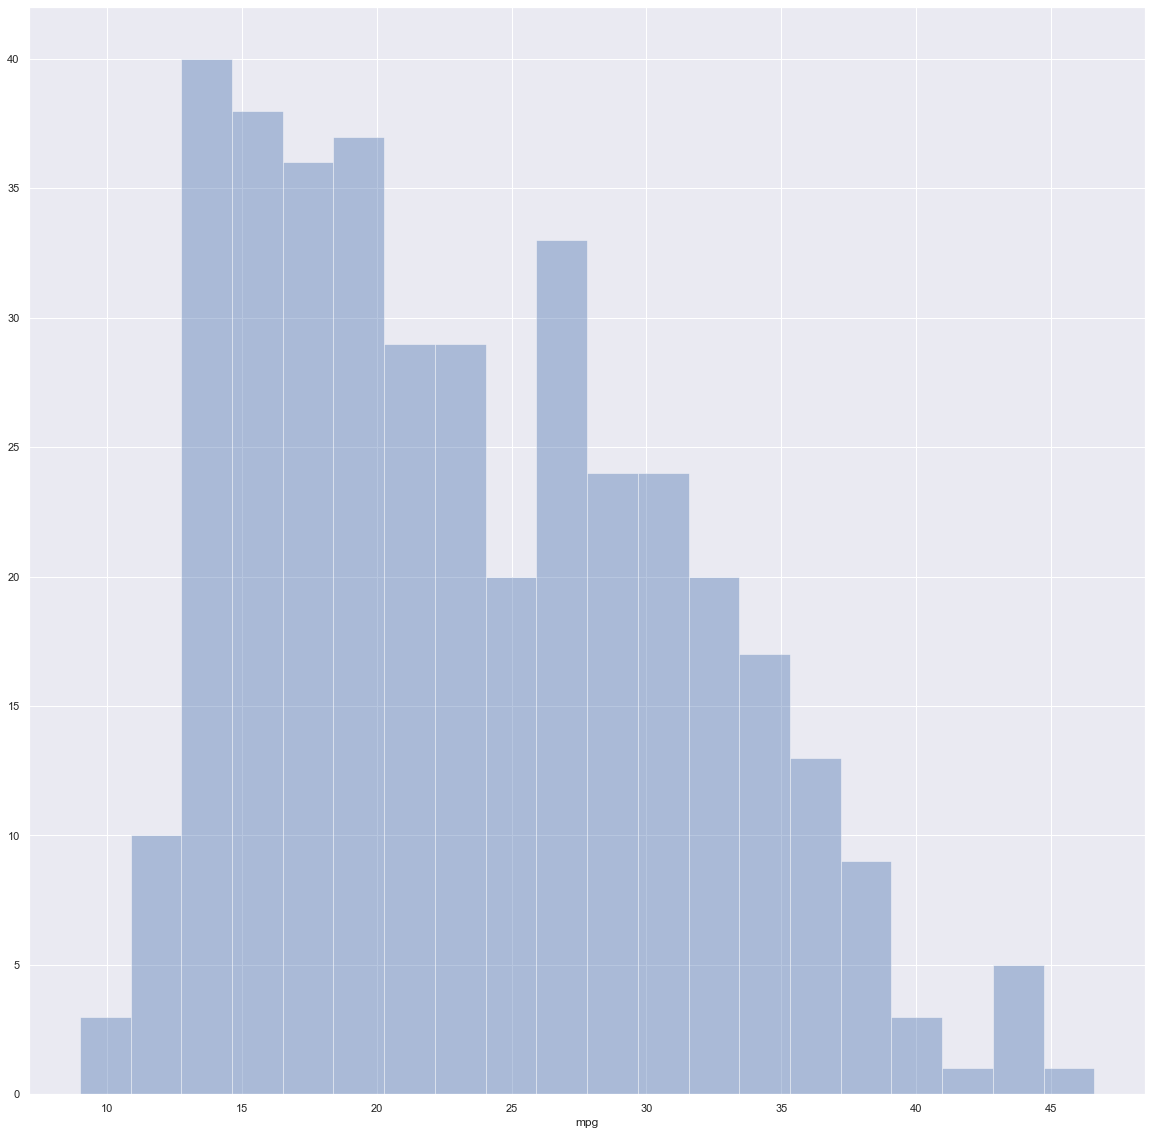

In [91]:
sns.distplot(auto_data["mpg"], kde = False, bins = 20)

If we want to produce a scatterplot matrix, i.e. a scatterplot of every pair of variables of a given data set, we can use a `PairGrid`. To do so, we first initialize the grid with our desired data set, and then pass the plotting function to a `map` method that will be called on each subplot. Alternatively, we can use the companion function, `pairplot()` that trades off some flexibility for faster plotting.

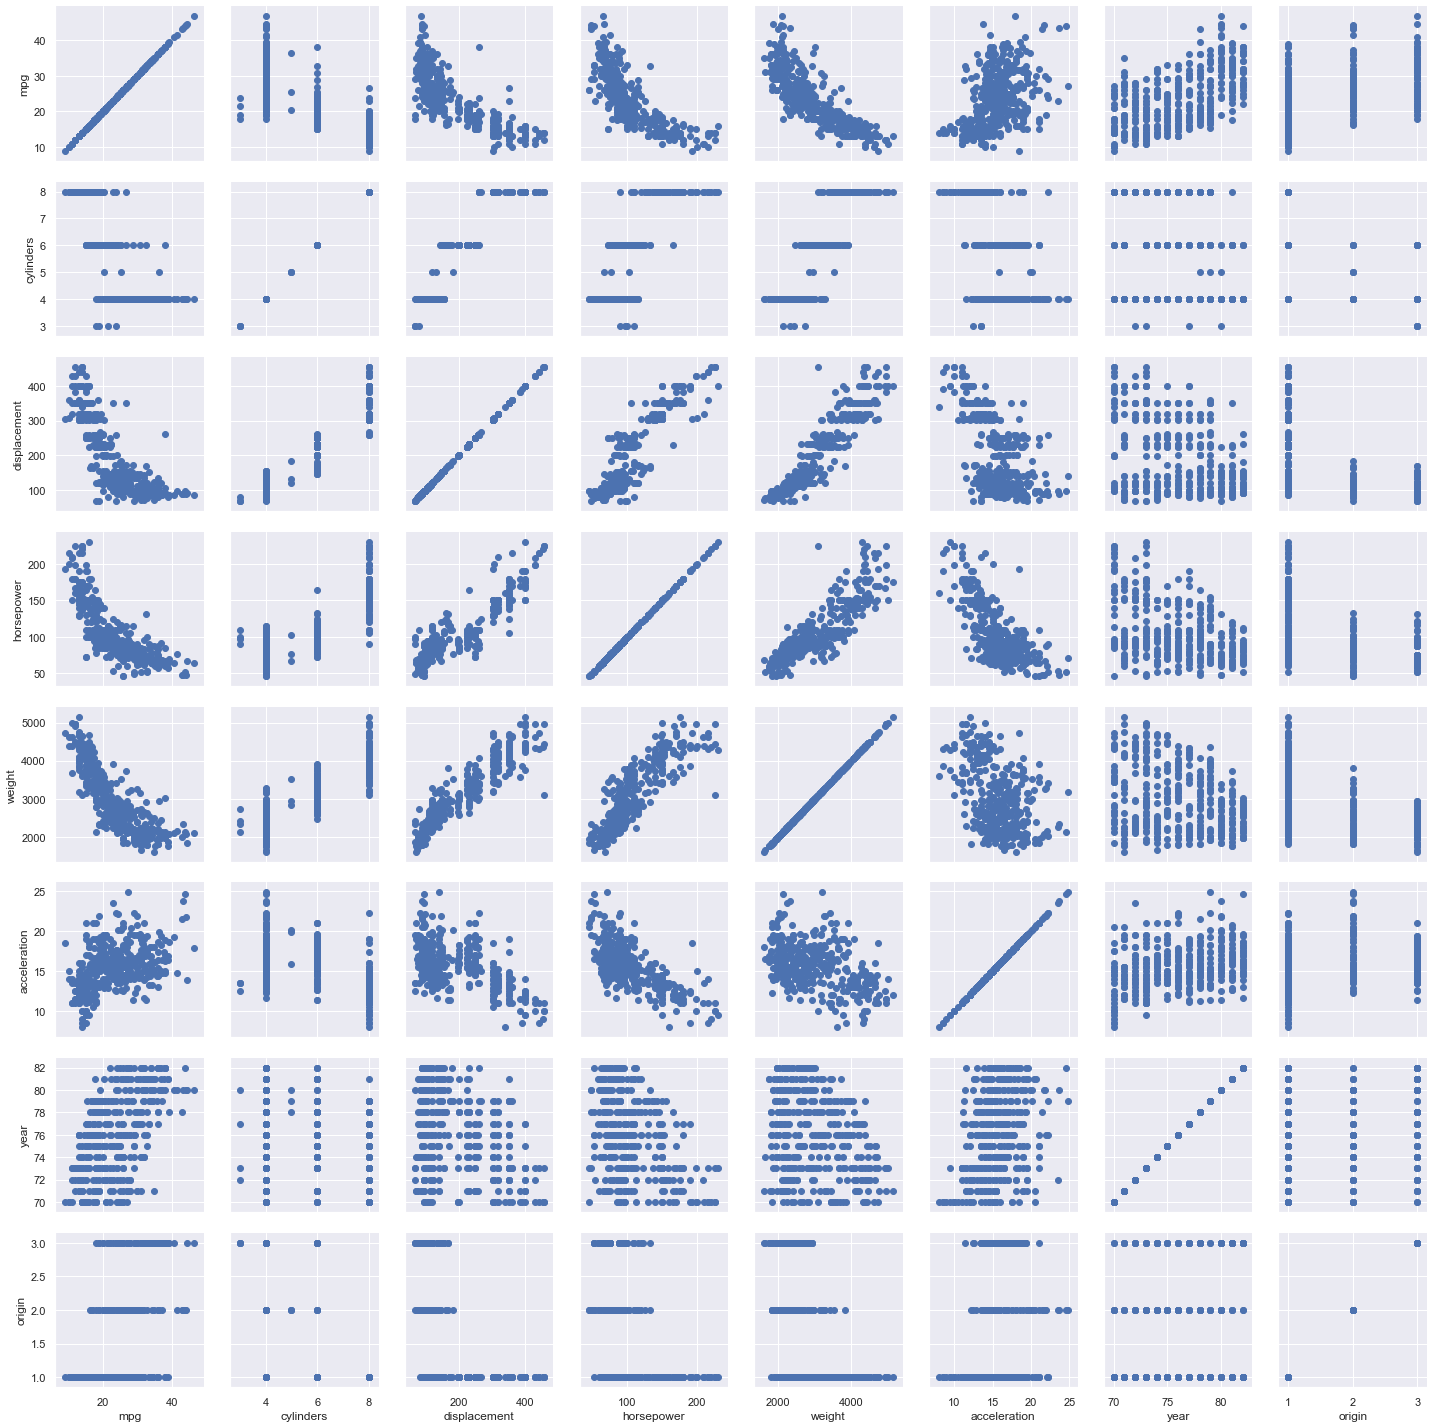

In [92]:
g = sns.PairGrid(auto_data)
g.map(plt.scatter)

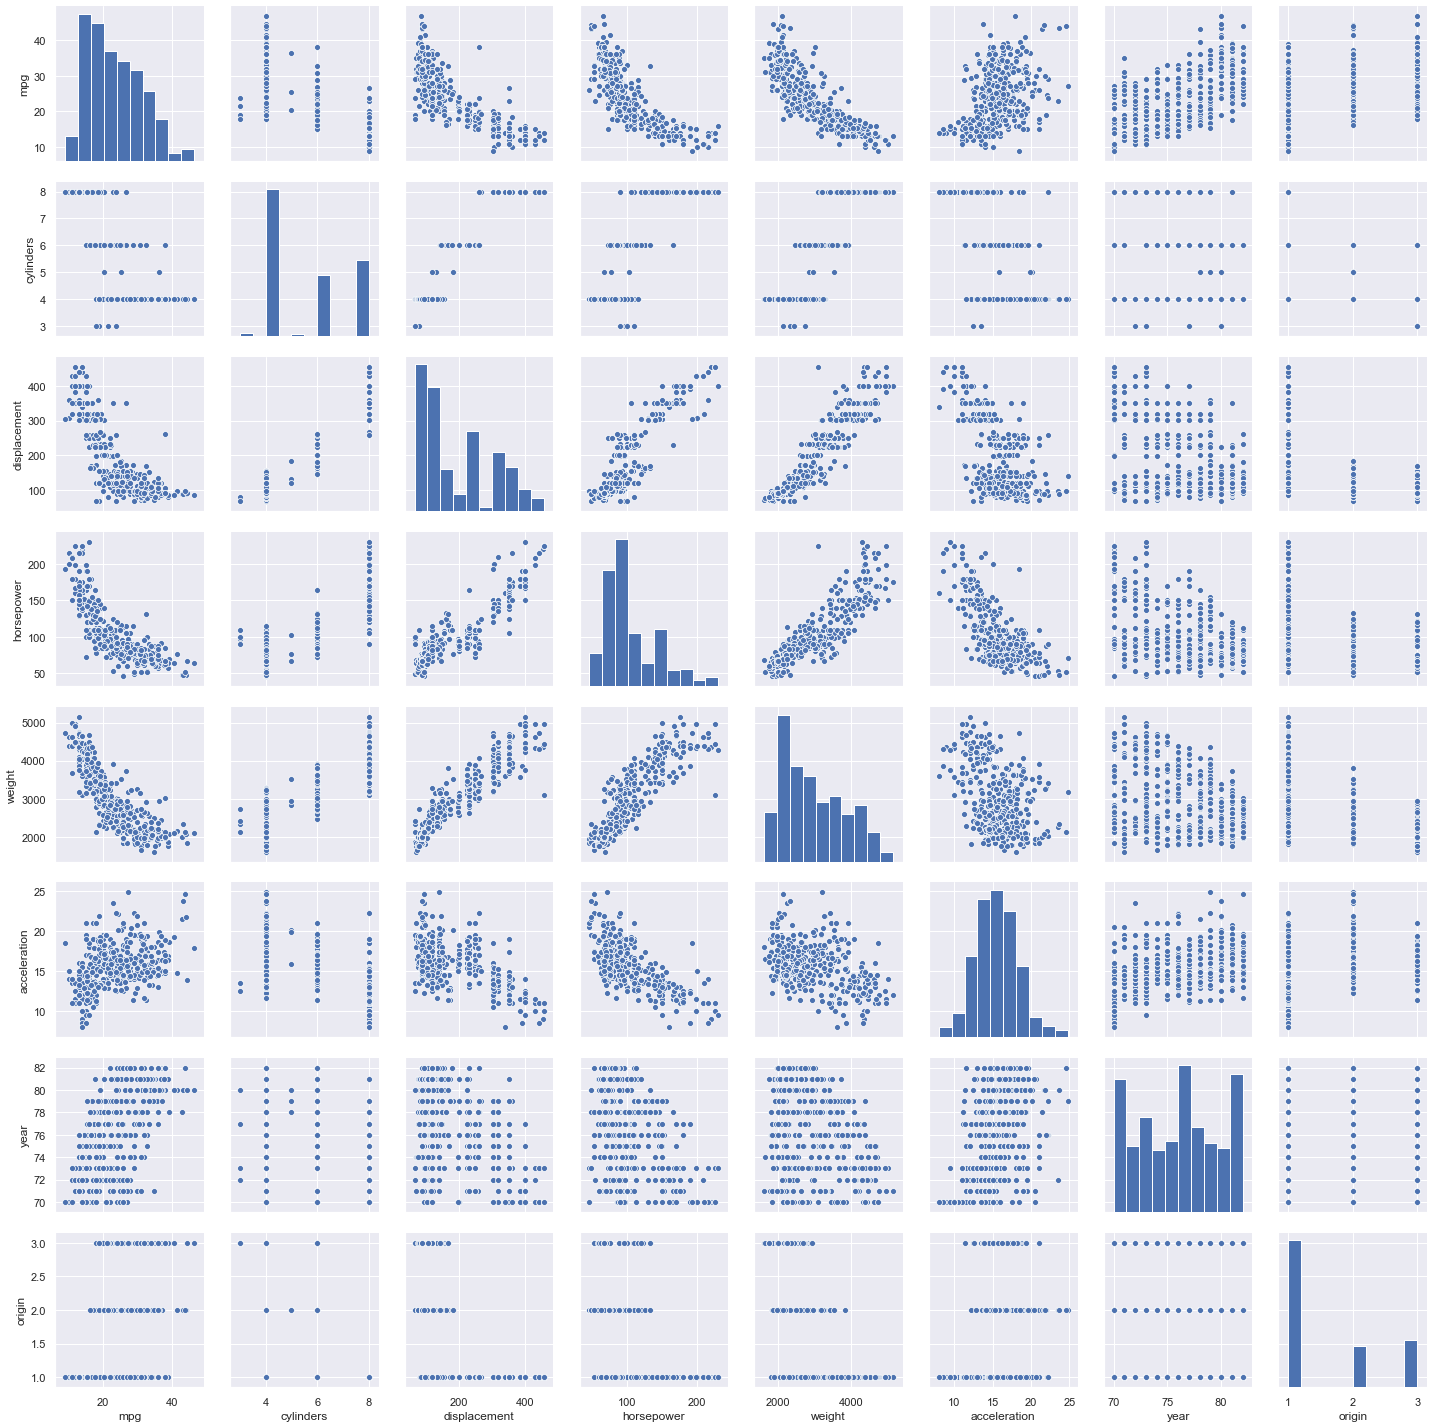

In [93]:
sns.pairplot(auto_data)

We can also specify a subset of the variables we wish to use in the pairplot by using the `vars` argument.

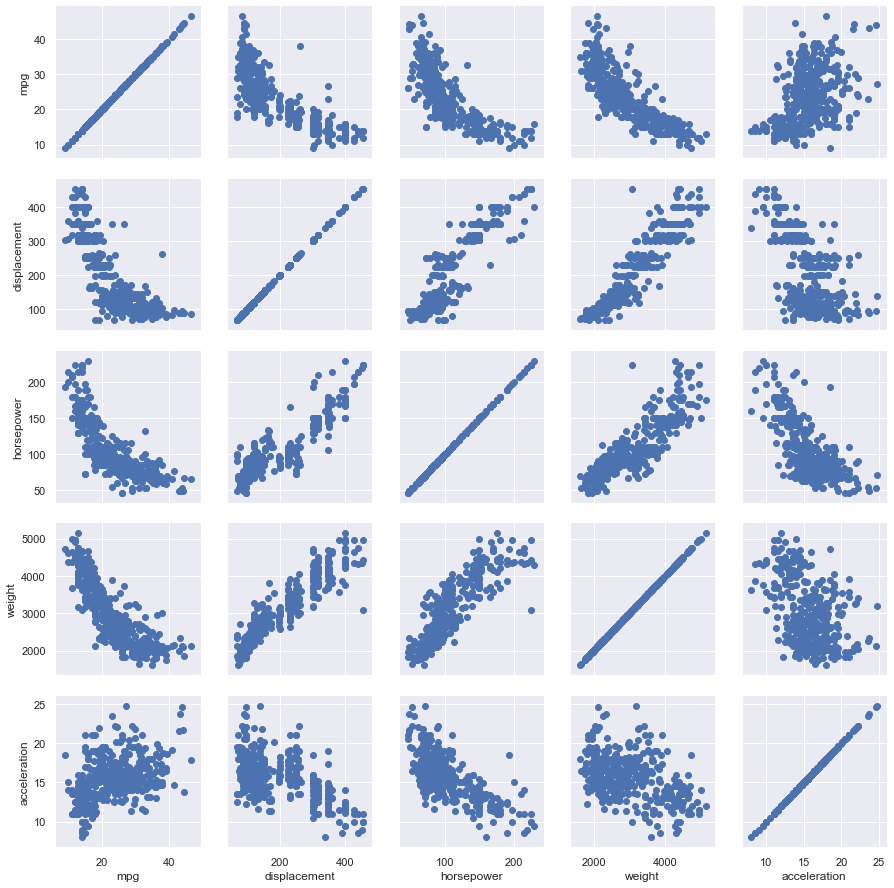

In [94]:
g = sns.PairGrid(auto_data, vars = ["mpg", "displacement", "horsepower", "weight", "acceleration"])
g.map(plt.scatter)

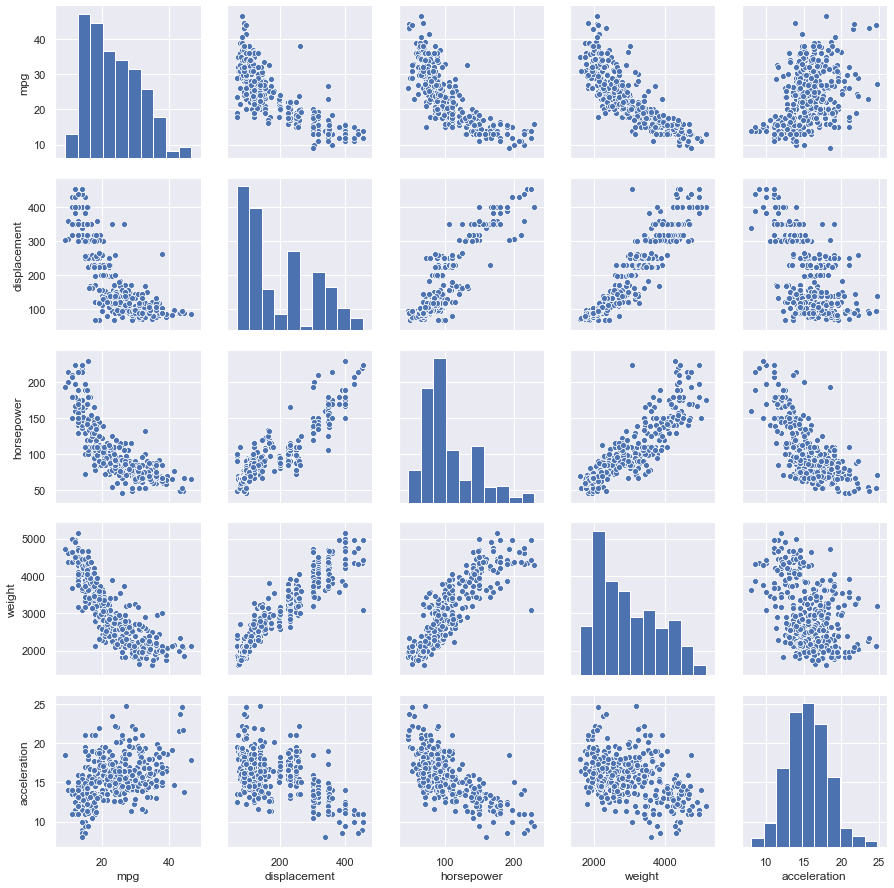

In [95]:
sns.pairplot(auto_data, vars = ["mpg", "displacement", "horsepower", "weight", "acceleration"])

Note that by default the `pairplot()` function produces histograms on the diagonal instead of scatterplots. If we wish to reproduce this behavior using a PairGrid, we need to use the `map_diag()` and `map_offdiag()` functions. Do note that the axis ticks won't correspond to the count or density axis of the plots on the diagonal.

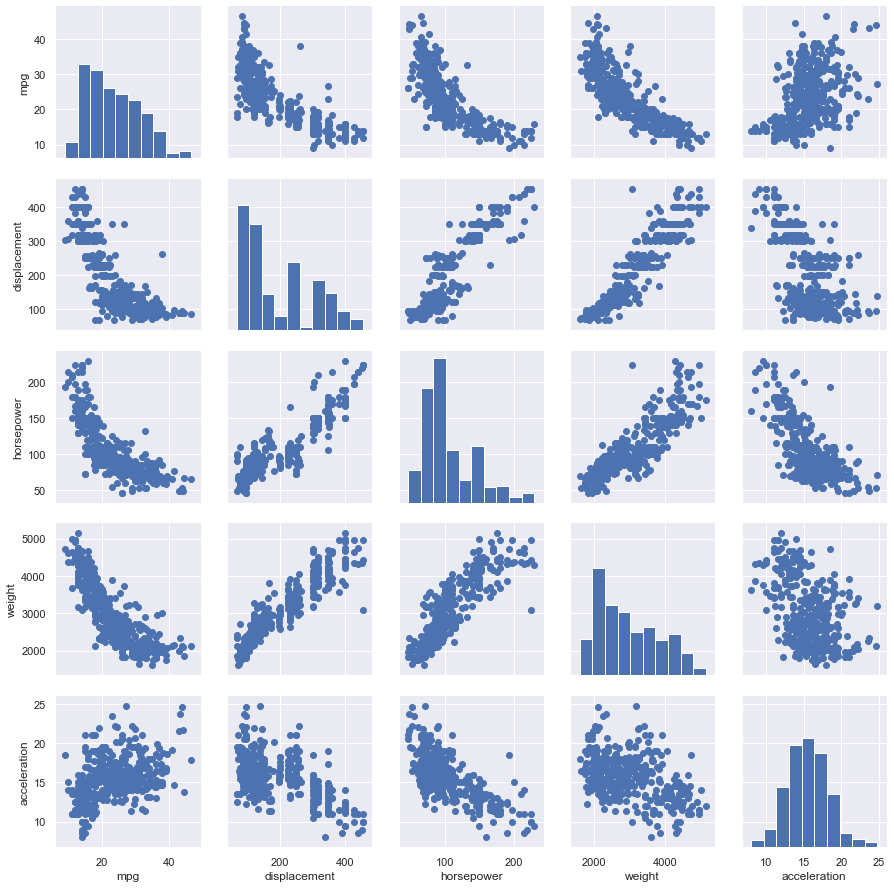

In [96]:
g = sns.PairGrid(auto_data, vars = ["mpg", "displacement", "horsepower", "weight", "acceleration"])
g.map_offdiag(plt.scatter)
g.map_diag(plt.hist)

Lastly, if we want to view summary data for each variable, we can use the `describe()` function. By default it only provides summary statistics for the numeric fields, but we can alter that behavior using the `include` argument.

In [97]:
auto_data.describe() # Only describes the numeric data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [98]:
auto_data.describe(include = "all") # Provide summary statistics for all columns

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,301
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toyota corolla
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,NaN
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,NaN
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,NaN


If we want to describe a single column, we can use the `describe` method on that column.

In [100]:
auto_data["mpg"].describe() # Summary statistics for just the mpg column

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [101]:
auto_data["name"].describe() # Summary statisticst for just the name column

count                392
unique               301
top       toyota corolla
freq                   5
Name: name, dtype: object